In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 10-fold validation

amenity_mapping = {
    0: 'Limited-Service Restaurants',
    1: 'Snack and Nonalcoholic Beverage Bars',
    2: 'Full-Service Restaurants',
    3: 'Drinking Places',
    # 4: 'Special Food Services',
}
mode_mapping = {0: 'Walking', 1: 'Public_transport', 2: 'Car'}


def plot(data, choice_type, num_bins=10):
    if choice_type == 'amenity':
        num_classes = len(amenity_mapping)
        mapping = amenity_mapping
    elif choice_type == 'mode':
        num_classes = len(mode_mapping)
        mapping = mode_mapping
    else:
        raise ValueError('choice_type should be either amenity or mode')
    plot_data = pd.DataFrame(columns=['probability', 'lable', 'class_index'])

    for index in range(num_classes):
        y_true = np.array(
            data[f'target_{choice_type}_numeric'] == index).astype(int)
        y_pred = np.array(
            data[f'predict_{choice_type}_numeric'] == index).astype(int)
        y_trues = np.array_split(y_true, num_bins)
        y_preds = np.array_split(y_pred, num_bins)

        for fold_true, fold_pred in zip(y_trues, y_preds):
            prob_true = fold_true.mean()
            prob_pred = fold_pred.mean()
            plot_data.loc[len(plot_data)] = [prob_true, 'groud truth', index]
            plot_data.loc[len(plot_data)] = [prob_pred, 'prediction', index]

    g = sns.catplot(
        data=plot_data, kind="bar", hue="lable",
        x="class_index", y="probability", errorbar="se", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("", "probability")
    g.set_yticklabels(rotation=0)

    # Create custom legend for amenity classes
    # Get the existing legend handles and labels
    handles, labels = g.ax.get_legend_handles_labels()
    for idx, label in mapping.items():
        handles.append(plt.Line2D([0], [0], color='black', marker='o',
                                  label=f'{idx}: {label}', markersize=3))
    g.legend.remove()
    plt.legend(handles=handles, bbox_to_anchor=(
        1.05, 0), loc='lower left', fontsize='small', frameon=False)
    plt.show()

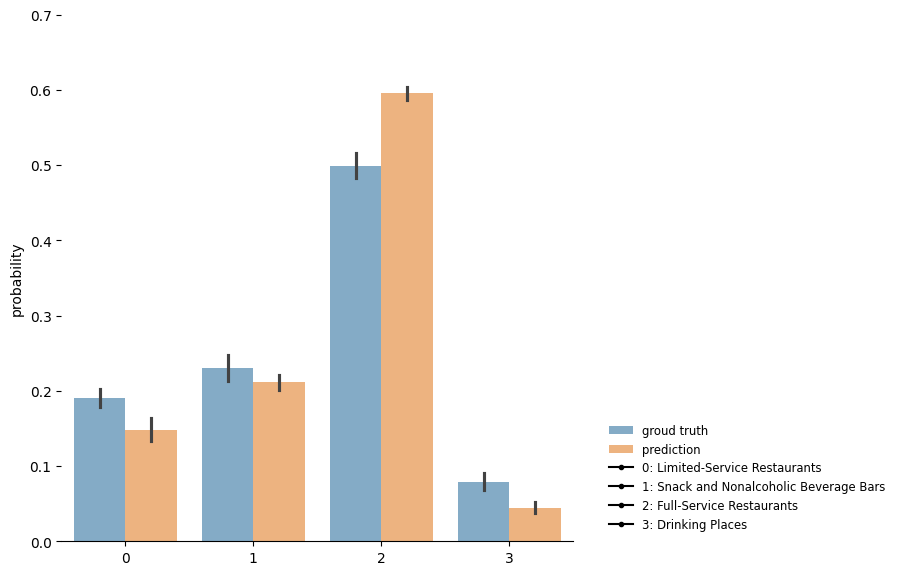

In [21]:
from model import ChoiceModel


model_name = 'proposed_method'
num_sample = 100
desire = 'Eat'
choice_type = 'amenity'
seed = 42

choice_model = ChoiceModel(data_dir='data', desire=desire, choice_type=choice_type,
                           sample_num=num_sample, skip_init=True, seed=seed)


log_path = choice_model.log_data_path
test_path = choice_model.test_data_path
data = choice_model._read_log_data(log_path, test_path)
plot(data, choice_type=choice_type)

781


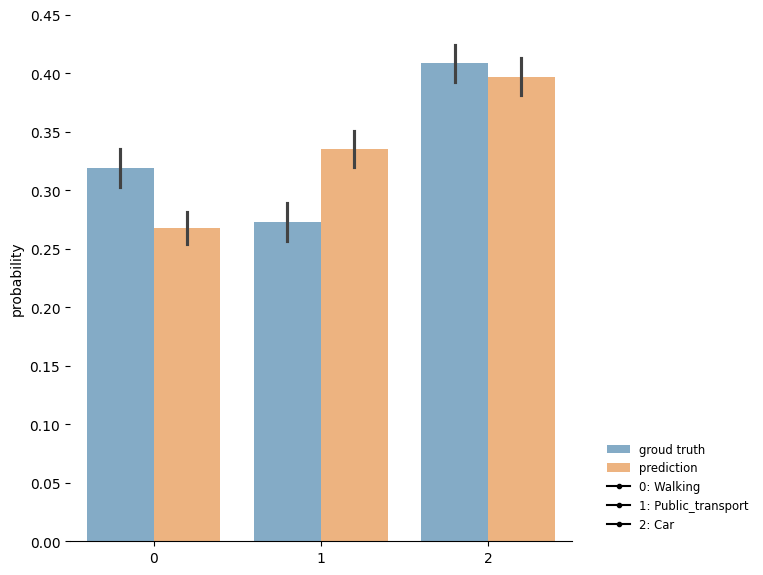

In [23]:
from model import ChoiceModel


model_name = 'proposed_method'
num_sample = 100
desire = 'Eat'
choice_type = 'mode'
seed = 42

choice_model = ChoiceModel(data_dir='data', desire=desire, choice_type=choice_type,
                           sample_num=num_sample, skip_init=True, seed=seed)


log_path = choice_model.log_data_path
test_path = choice_model.test_data_path
data = choice_model._read_log_data(log_path, test_path)
print(len(data))
plot(data, choice_type=choice_type)

# Random Forest


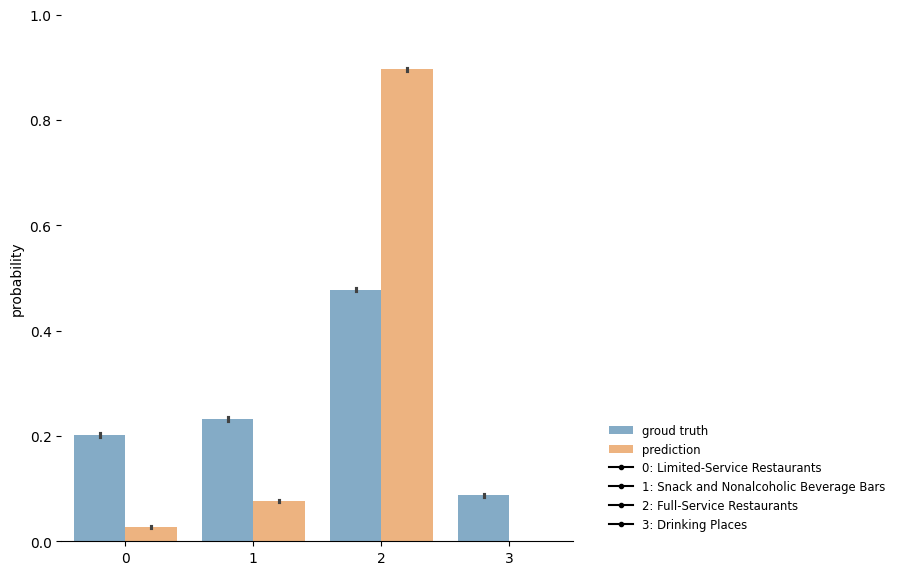

In [14]:
from baseline.models.random_forest import RandomForest

num_sample = 1000
choice_type = 'amenity'
desire = 'Eat'
seed = 42

model = RandomForest(data_dir='baseline/data', choice_type=choice_type,
                     desire=desire, sample_num=num_sample, seed=seed)
model.load_dataset()
model.prepare_data()
model.optimize()
model.train()
data = model.get_results()
plot(data, choice_type)

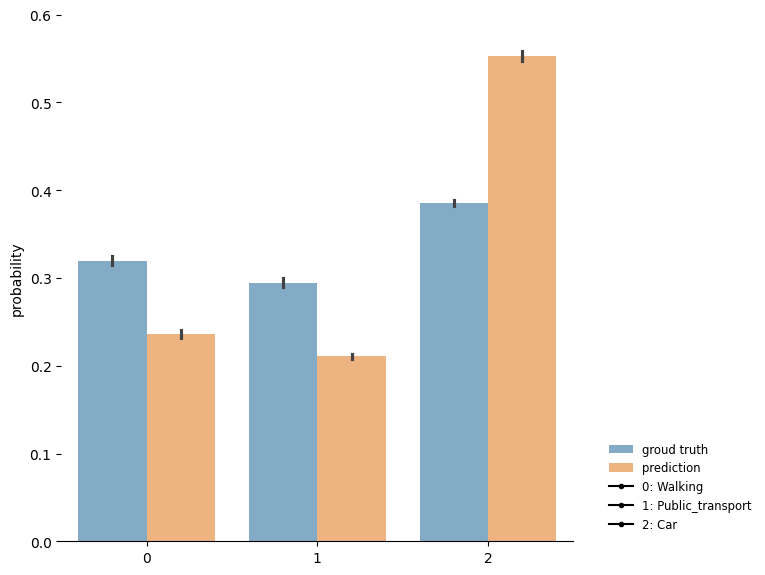

In [13]:
from baseline.models.random_forest import RandomForest

num_sample = 1000
choice_type = 'mode'
desire = 'Eat'
seed = 42

model = RandomForest(data_dir='baseline/data', choice_type=choice_type,
                     desire=desire, sample_num=num_sample, seed=seed)
model.load_dataset()
model.prepare_data()
model.optimize()
model.train()
data = model.get_results()
plot(data, choice_type)